In [1]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [2]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [4]:
len(filenames)

44441

In [5]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [6]:
img = image.load_img('1531.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.03699746, 0.01303428, ..., 0.00977649, 0.01712199,
       0.02275786], dtype=float32)

In [7]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [8]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([0.        , 0.01761617, 0.00171604, ..., 0.01247241, 0.02726403,
       0.06899223], dtype=float32)

In [12]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.        , 0.01761617, 0.00171604, ..., 0.01247241, 0.02726403,
        0.06899223], dtype=float32),
 array([0.        , 0.03648945, 0.        , ..., 0.00997915, 0.02375535,
        0.04649904], dtype=float32),
 array([0.        , 0.03507714, 0.00732278, ..., 0.00283508, 0.        ,
        0.05435886], dtype=float32),
 array([0.00232165, 0.05030549, 0.00747744, ..., 0.00346687, 0.03391024,
        0.04565736], dtype=float32),
 array([0.00306834, 0.06240455, 0.        , ..., 0.00170625, 0.02032888,
        0.0583326 ], dtype=float32),
 array([0.        , 0.1046918 , 0.00198066, ..., 0.        , 0.03033055,
        0.02712929], dtype=float32),
 array([0.        , 0.12438457, 0.01465612, ..., 0.00289705, 0.0405516 ,
        0.06534589], dtype=float32),
 array([0.        , 0.09169196, 0.01569913, ..., 0.        , 0.00503582,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545271, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661071], dtype=float32),
 array([0.

In [13]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [14]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [15]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [16]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [17]:
np.array(Image_features).shape

(44441, 2048)

In [18]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [19]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [20]:
input_image = extract_features_from_images('1531.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [21]:
distance,indices = neighbors.kneighbors([input_image])

In [22]:
indices[0]

array([ 4468,  7623,  4737,  9225, 44376, 18114], dtype=int64)

In [23]:
from IPython.display import Image

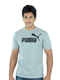

In [24]:
Image('1531.jpg')

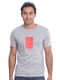

In [25]:
Image(filenames[indices[0][1]])

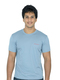

In [26]:
Image(filenames[indices[0][2]])

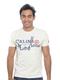

In [27]:
Image(filenames[indices[0][3]])

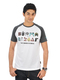

In [28]:
Image(filenames[indices[0][4]])

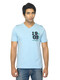

In [29]:
Image(filenames[indices[0][5]])